In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(array([ 86., 109., 105., 102., 116., 111.,  82.,  78., 102., 109.]),
 array([6.21139534e-04, 1.00435819e-01, 2.00250498e-01, 3.00065177e-01,
        3.99879856e-01, 4.99694535e-01, 5.99509214e-01, 6.99323893e-01,
        7.99138572e-01, 8.98953251e-01, 9.98767930e-01]),
 <a list of 10 Patch objects>)

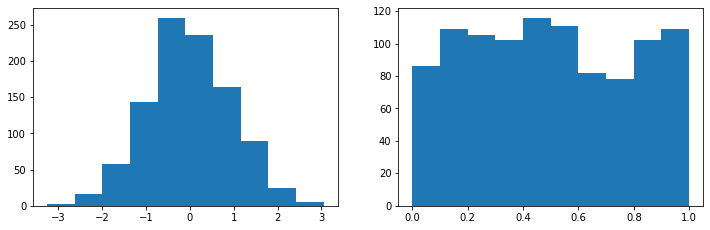

In [2]:
plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.hist(np.random.normal(size=1000))

plt.subplot(222)
plt.hist(np.random.uniform(size=1000))

# Working with data

## "Garbage In - Garbage Out."

## "Quality data beats fancy algorithms."


- Data Quality (validity, accuracy, completeness, consistency, uniformity)
- The workflow (inspection, cleaning, verifying, reporting)

          1.   Inspection (data profiling, visualizations, software packages)
          2.   Cleaning (irrelevant data, duplicates, type conver., syntax errors, 6 more)
          3.   Verifying
          4.   Reporting

High-quality data needs to pass a set of quality criteria. Those include:

**Validity** 

> *Data-Type Constraints:* values in a particular column must be of a particular datatype, e.g., boolean, numeric, date, etc.

> *Range Constraints:* typically, numbers or dates should fall within a certain range.

> *Mandatory Constraints:* certain columns cannot be empty.

> *Unique Constraints:* a field, or a combination of fields, must be unique across a dataset.

> *Set-Membership constraints:* values of a column come from a set of discrete values, e.g. enum values. For example, a person’s gender may be male or female.

> *Foreign-key constraints:* as in relational databases, a foreign key column can’t have a value that does not exist in the referenced primary key.

> *Regular expression patterns:* text fields that have to be in a certain pattern. For example, phone numbers may be required to have the pattern (999) 999–9999.

> *Cross-field validation:* certain conditions that span across multiple fields must hold. For example, a patient’s date of discharge from the hospital cannot be earlier than the date of admission.

**Accuracy**
> The degree to which the data is close to the true values.

> A valid street address mightn’t actually exist. A valid person’s eye colour, say blue, might be valid, but not true (doesn’t represent the reality).
Another thing to note is the difference between accuracy and precision. Saying that you live on the earth is, actually true. But, not precise. Where on the earth?. Saying that you live at a particular street address is more precise.

**Completeness**

> The degree to which all required data is known.

Here’s some typical reasons why data is missing:
- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

**Consistency**

> The degree to which the data is consistent, within the same data set or across multiple data sets.

Inconsistency occurs when two values in the data set contradict each other.

- A valid age, say 10, mightn’t match with the marital status, say divorced.
- A customer is recorded in two different tables with two different addresses.

Which one is true?.

**Uniformity**

> The degree to which the data is specified using the same unit of measure.

- The weight may be recorded either in pounds or kilos.
- The date might follow the USA format or European format.
- The currency is sometimes in USD and sometimes in YEN.

And so data must be converted to a single measure unit.

In [3]:
#Validity 
## Data-Type Constaints
data_type_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_data_type_correct.csv')
data_type_correct

,name,scholarship
0,Nicu,True
1,Mihai,True
2,Gigel,True
3,John,False


In [4]:
print(data_type_correct['name'])
print(data_type_correct['scholarship'])

0     Nicu
1    Mihai
2    Gigel
3     John
Name: name, dtype: object
0     True
1     True
2     True
3    False
Name: scholarship, dtype: bool


In [11]:
#Validity 
## Data-Type Constaints
data_type_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_data_type_wrong.csv')
data_type_wrong

,name,scholarship
0,Nicu,400
1,Mihai,True
2,2,True
3,John,350


In [13]:
print(data_type_wrong['name'])
print(data_type_wrong['scholarship'])

0     Nicu
1    Mihai
2        2
3     John
Name: name, dtype: object
0     400
1    True
2    True
3     350
Name: scholarship, dtype: object


In [0]:
print(bool(350))

In [14]:
#Validity 
## Range Constaints
range_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_range_correct.csv')
range_correct

,student,grade
0,Tribianni,5
1,Bing,8
2,Geller,10
3,Geller,9
4,Greene,7
5,Buffay,8


In [15]:
print(np.logical_and(range_correct['grade']<=10,range_correct['grade']>0))

0    True
1    True
2    True
3    True
4    True
5    True
Name: grade, dtype: bool


In [16]:
#Validity 
## Range Constaints
range_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_range_wrong.csv')
range_wrong

,nr_working_days,normal_hours_worked
0,20,160
1,21,168
2,22,176
3,20,170
4,20,168


In [17]:
print(range_wrong['normal_hours_worked'] <= range_wrong['nr_working_days'] * 8)

0     True
1     True
2     True
3    False
4    False
dtype: bool


In [18]:
#Validity
## Mandatory Constraints
mandatory_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_mandatory_correct.csv')
mandatory_correct

,student_id,faculty,speciality
0,310440205002SM171049,FEAA,IE
1,310440205002SM171050,FEAA,CIG
2,310440205002SM171051,FEAA,SPE


In [19]:
mandatory_correct['student_id'].isnull().sum()

0

In [20]:
#Validity
## Mandatory Constraints
mandatory_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_mandatory_wrong.csv')
mandatory_wrong

,product_id,product_name,price
0,NaN,apple,4.4
1,2.0,blueberry,8.0
2,3.0,peach,6.0
3,NaN,cherry,10000000.0


In [21]:
mandatory_wrong['product_id'].isnull().sum()

2

In [22]:
#Validity
## Unique Constraints
unique_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_unique_correct.csv')
unique_correct

,transaction_id,amount
0,1,40.20
1,2,23.44
2,3,445.10
3,4,556.10


In [23]:
unique_correct['transaction_id'].nunique() == len(unique_correct['transaction_id'])

True

In [24]:
#Validity
## Unique Constraints
unique_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_unique_wrong.csv')
unique_wrong

,order_id,total_value
0,1,230
1,1,45
2,2,23
3,2,34


In [25]:
unique_wrong['order_id'].nunique() == len(unique_wrong['order_id'])

False

In [26]:
#Validity
## Set-Membership constraints
member_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_set_member_correct.csv')
member_correct

,name,house
0,Harry Potter,Gryffindor
1,Hermione Granger,Gryffindor
2,Cedric Diggory,Hufflepuff
3,Luna Lovegood,Ravenclaw
4,Draco Malfoy,Slytherin


In [27]:
member_correct['house'].isin(['Gryffindor','Hufflepuff', 'Ravenclaw', 'Slytherin']).sum() == len(member_correct['house'])

True

In [28]:
#Validity
## Set-Membership constraints
member_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_set_member_wrong.csv')
member_wrong

,name,gender
0,Harry,M
1,Hermione,F
2,Ron,M
3,Luna,F
4,Albus,M
5,Draco,person
6,Hedwig,NaN


In [29]:
member_wrong['gender'].isin(['M', 'F']).sum() == len(member_wrong['gender'])

False

In [30]:
#Validity
## Regular expression patterns c-onstraints
regex_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_regex_correct.csv')
regex_correct

,name,phone_number
0,Barney,0744-560-198
1,Robin,0751-450-103
2,Marshall,0767-964-432
3,Ted,0745-689-123
4,Lily,0701-019-778


In [32]:
import re
pattern = re.compile("[0-9][0-9][0-9][0-9]-[0-9][0-9][0-9]-[0-9][0-9][0-9]")

regex_correct.phone_number.apply(lambda x: bool(pattern.match(x)))

0    True
1    True
2    True
3    True
4    True
Name: phone_number, dtype: bool

In [33]:
#Validity
## Regular expression patterns constraints
regex_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_regex_wrong.csv')
regex_wrong

,car_owner,car_number
0,Frodo,IS12AAA
1,Bilbo,IS111B
2,Gandalf,is45bba


In [34]:
pattern = re.compile("[A-Z][A-Z][0-9][0-9][A-Z][A-Z][A-Z]")

regex_wrong.car_number.apply(lambda x: bool(pattern.match(x)))

0     True
1    False
2    False
Name: car_number, dtype: bool

In [35]:
#Validity
## Cross-field validation constraints
cross_field_correct = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_cross_field_correct.csv')
cross_field_correct

,student_id,start_year,end_year
0,1,2014,2017
1,2,2014,2017
2,3,2017,2020
3,4,2018,2021
4,5,2019,2022


In [36]:
print(cross_field_correct['start_year'] < cross_field_correct['end_year'])
print(len(cross_field_correct['start_year'] < cross_field_correct['end_year']),len(cross_field_correct))

0    True
1    True
2    True
3    True
4    True
dtype: bool
5 5


In [37]:
#Validity
## Cross-field validation constraints
cross_field_wrong = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/validity_cross_field_wrong.csv')
cross_field_wrong


,patient_id,date_of_admission,date_of_discharge
0,1,01-10-2019,03-10-2019
1,2,05-11-2018,04-11-2018
2,3,05-09-2019,05-12-2018


In [38]:
from datetime import datetime

for k,v in cross_field_wrong.iterrows():
  print(datetime.strptime(v['date_of_admission'],'%d-%m-%Y') < datetime.strptime(v['date_of_discharge'],'%d-%m-%Y'))

True
False
False


In [39]:
#Accurracy
acc_wrong_1 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/accuracy_wrong_1.csv')
acc_wrong_1

,name,eye_color
0,Tony,brown
1,Thor,blue
2,Hulk,green
3,Wanda,purple
4,Steve,hazel


In [41]:
#Accurracy
acc_wrong_2 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/accurracy_wrong_2.csv')
acc_wrong_2

,name,address
0,Sherlock,Baker Street 221B
1,John,Baker Street 221B
2,Ms. Hudson,Baker Street 221B
3,Moriarty,Great Britain
4,Mycroft,Earth


In [42]:
#Completness

house_prices = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/kaggle_house_prices_train.csv')
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
print(house_prices.isna())

         Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0     False       False     False  ...     False          False      False
1     False       False     False  ...     False          False      False
2     False       False     False  ...     False          False      False
3     False       False     False  ...     False          False      False
4     False       False     False  ...     False          False      False
...     ...         ...       ...  ...       ...            ...        ...
1455  False       False     False  ...     False          False      False
1456  False       False     False  ...     False          False      False
1457  False       False     False  ...     False          False      False
1458  False       False     False  ...     False          False      False
1459  False       False     False  ...     False          False      False

[1460 rows x 81 columns]


In [47]:
pd.options.display.max_rows = 999
print(house_prices.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [48]:
print(house_prices.isnull())

         Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0     False       False     False  ...     False          False      False
1     False       False     False  ...     False          False      False
2     False       False     False  ...     False          False      False
3     False       False     False  ...     False          False      False
4     False       False     False  ...     False          False      False
...     ...         ...       ...  ...       ...            ...        ...
1455  False       False     False  ...     False          False      False
1456  False       False     False  ...     False          False      False
1457  False       False     False  ...     False          False      False
1458  False       False     False  ...     False          False      False
1459  False       False     False  ...     False          False      False

[1460 rows x 81 columns]


In [49]:
pd.options.display.max_rows = 999
print(house_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [50]:
#Consistency
#a little exagerated example
print(house_prices[['SalePrice','LotArea']])

      SalePrice  LotArea
0        208500     8450
1        181500     9600
2        223500    11250
3        140000     9550
4        250000    14260
...         ...      ...
1455     175000     7917
1456     210000    13175
1457     266500     9042
1458     142125     9717
1459     147500     9937

[1460 rows x 2 columns]


In [51]:
#Uniformity
uniformity_wrong_1 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/uniformity_wrong_1.csv')
uniformity_wrong_1

,name,weight_unit,weight
0,Batman,kg,95
1,Joker,pounds,176
2,Superman,kg,1000


In [52]:
uniformity_wrong_2 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/uniformity_wrong_2.csv')
uniformity_wrong_2

,transaction_id,transaction_date
0,1,30-10-2019
1,2,10/31/2019
2,3,29/10/2019


In [53]:
uniformity_wrong_3 = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/uniformity_wrong_3.csv')
uniformity_wrong_3

,transaction_currency,transaction_ammount
0,USD,345
1,EUR,200
2,RON,322


# The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [54]:
total = house_prices.isnull().sum().sort_values(ascending=False)
percent = (house_prices.isnull().sum()/house_prices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Sometimes missing data can be in different formats besides NaN: 

- n/a
- NA
- "--"
- na

In [0]:
#the following code will output an error as there is no csv file. This is just to show how to treat the case
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("data.csv", na_values = missing_values)

Solutions: 

- drop column
- transform it to two columns with values True/False (1/0)
- complete the data (mean,median,mode)

In [55]:
#drop
house_prices = house_prices.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [56]:
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [57]:
# transform columns
# works for categorical data as well
street_df = pd.get_dummies(house_prices['Street'], prefix='Street')
house_prices = pd.concat([house_prices,street_df], axis=1)
house_prices.drop(columns=['Street'])
house_prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,0,1
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,0,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,0,1
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal

In [59]:
house_prices = house_prices.drop(columns=['Street'])
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [0]:
# complete data
#mode
house_prices['GarageYrBlt'].fillna(house_prices['GarageYrBlt'].mode()[0] , inplace = True)

In [63]:
print(house_prices['GarageYrBlt'].mode()[0])
house_prices['GarageYrBlt'].isnull().sum()


2005.0


0

In [64]:
# complete data
# mean
house_prices['SalePrice'][0] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
house_prices['SalePrice'].isnull().sum()

1

In [0]:
house_prices['SalePrice'].fillna(house_prices['SalePrice'].mean() , inplace = True)

In [67]:
house_prices['SalePrice'].isnull().sum()

0

In [68]:
house_prices['SalePrice'][0]

180902.2933516107

In [69]:
# complete data
# median
print(house_prices['TotalBsmtSF'][0])
house_prices['TotalBsmtSF'][0] = np.NaN

856


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
house_prices['TotalBsmtSF'].fillna(house_prices['TotalBsmtSF'].median() , inplace = True)

In [71]:
house_prices['TotalBsmtSF'][0]

992.0

## Outliers

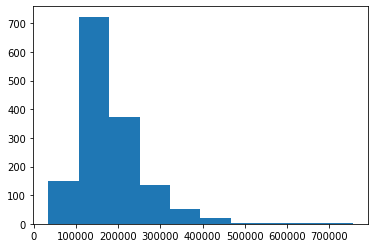

In [72]:
plt.hist(house_prices['SalePrice'])
plt.show()

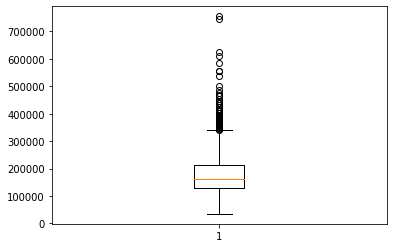

In [73]:
plt.boxplot(house_prices['SalePrice'])
plt.show()

In [74]:
house_prices.sort_values(by='SalePrice', ascending=False)
# Either delete them or keep  them. 
# Better to do both and see how accurate will the model be in both cases

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave
691,692,60,RL,104.0,21535,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000.0,0,1
1182,1183,60,RL,160.0,15623,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396.0,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000.0,0,1
1169,1170,60,RL,118.0,35760,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930.0,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,0,7,2006,WD,Normal,625000.0,0,1
898,899,20,RL,100.0,12919,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,0,3,2010,New,Partial,611657.0,0,1
803,804,60,RL,107.0,13891,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734.0,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,0,1,2009,New,Partial,582933.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,70,C (all),50.0,8500,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649.0,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,0,7,2008,WD,Normal,40000.0,0,1
533,534,20,RL,50.0,5000,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0.0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,2005.0,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,1,2007,WD,Normal,39300.0,0,1
968,969,50,RM,50.0,5925,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600.0,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,2005.0,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,5,2009,WD,Abnorml,37900.0,0,1
916,917,20,C (all),50.0,9000,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480.0,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,0,10,200

## Data Format
Ex. car annotation

In [75]:
#relevant data
cars_ok = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/cars_ok.csv')
print(cars_ok)
#a little bit of irrelevant data. twice the volume of necessary
cars_not_ok = pd.read_csv('https://raw.githubusercontent.com/OwlHowl3/FEAA_Data_Science/master/data/cars_not_that_ok.csv')
print(cars_not_ok)

   id  x_min  y_min  x_max  y_max
0   1      1      1     90     90
1   2     10     20    120    150
2   3     35     10    165    132
   id  corner1_x  corner1_y  ...  corner3_y  corner4_x  corner4_y
0   1          1          1  ...         10         10          1
1   2         50         50  ...        250         50        250

[2 rows x 9 columns]
